<a href="https://colab.research.google.com/github/sNayanathara/Skin-Disease-Detection/blob/main/ML_Model_ipyb_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# Importing drive method from colab for accessing google drive
from google.colab import drive
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
##### Creating the training and testing datasets #####

# Mounting drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


  0%|          | 0/52 [00:00<?, ?it/s]

------------ 0
-------------- Rosacea
-------------- 52


  0%|          | 0/342 [00:00<?, ?it/s]

------------ 1
-------------- Psoriasis
-------------- 342


  0%|          | 0/194 [00:00<?, ?it/s]

------------ 2
-------------- Erythema
-------------- 194


  0%|          | 0/168 [00:00<?, ?it/s]

------------ 3
-------------- Herpes
-------------- 168


  0%|          | 0/58 [00:00<?, ?it/s]

------------ 4
-------------- Pustular Psoriasis
-------------- 58


  0%|          | 0/22 [00:00<?, ?it/s]

------------ 5
-------------- InsectBites
-------------- 22


  0%|          | 0/256 [00:00<?, ?it/s]

------------ 6
-------------- Allergic Contact Dermatitis
-------------- 256


  0%|          | 0/82 [00:00<?, ?it/s]

------------ 7
-------------- Drug Erruption
-------------- 82


  0%|          | 0/310 [00:00<?, ?it/s]

------------ 8
-------------- Atopic dermatitis
-------------- 310


  2%|▏         | 1/60 [00:00<00:10,  5.80it/s]

------------ 9
-------------- Alopecia
-------------- 60


  1%|          | 1/142 [00:00<00:23,  5.90it/s]

------------ 10
-------------- Acrodermatitis Enteropathica
-------------- 142


  0%|          | 0/290 [00:00<?, ?it/s]

------------ 11
-------------- Basal Cell Carcinoma
-------------- 290


  0%|          | 0/78 [00:00<?, ?it/s]

------------ 12
-------------- Granuloma Annulare
-------------- 78


  0%|          | 0/58 [00:00<?, ?it/s]

------------ 13
-------------- Lentigo Maligna
-------------- 58


  0%|          | 0/356 [00:00<?, ?it/s]

------------ 14
-------------- Lichen Planus
-------------- 356


  0%|          | 0/520 [00:00<?, ?it/s]

------------ 15
-------------- Acne
-------------- 520


  0%|          | 0/147 [00:00<?, ?it/s]

------------ 16
-------------- Bullous Disease
-------------- 147


  0%|          | 0/58 [00:00<?, ?it/s]

------------ 17
-------------- Irritant Contact Dermatitis
-------------- 58


  0%|          | 0/75 [00:00<?, ?it/s]

------------ 18
-------------- Candidiasis
-------------- 75


  0%|          | 0/70 [00:00<?, ?it/s]

------------ 19
-------------- Dermatomyositis
-------------- 70


  1%|          | 1/90 [00:00<00:11,  7.52it/s]

------------ 20
-------------- Epidermolysis Bullosa
-------------- 90


  3%|▎         | 1/32 [00:00<00:04,  6.57it/s]

------------ 21
-------------- Keratoacanthoma
-------------- 32


  0%|          | 0/634 [00:00<?, ?it/s]

------------ 22
-------------- Leprosy
-------------- 634


  0%|          | 0/194 [00:00<?, ?it/s]

------------ 23
-------------- Lupus Erythematosus
-------------- 194


100%|██████████| 194/194 [00:44<00:00,  4.35it/s]


Dimension of y_train_one_hot =  (3868, 24)
Dimension of y_test_one_hot  =  (420, 24)
Train: X= (3868, 128, 128, 3)
Test: X= (420, 128, 128, 3)
14 => [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 => [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


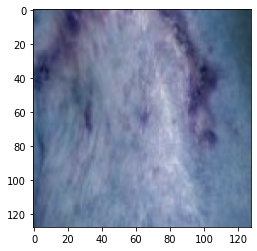

In [ ]:
#main folder with images
main_path = "/content/drive/My Drive/ML_Project_Images/All_Images/"

#temporarily stores training images and their corresponding class index 
train_set = []

#training and testing images
X_train_images = []
X_test_images = []

#training and testing labels
y_train = []
y_test = []

#gives each class an index
categorical_num = 0
#walk through all the folders in the main folder and directing the images into training and testing arrays
for root, dirs, files in os.walk(main_path): 
  
  if(os.path.basename(root)!= os.path.basename(main_path)):   #to prevent the main folder being allocated by a class index 

    count = 1    #to keep track of the number of images been walked through in each subfolder 
    
   
    label = os.path.basename(root)   #label of the image--name of the subfolder
    print("------------",categorical_num)
    print("--------------",label)
    print("--------------",len(files))
    test_set_size = int(len(files) * 0.1)  #append 20% of the tootal images in each subfolder to the testing array

    for i in tqdm(os.listdir(root)):  #loop through the images 
      path = os.path.join(root, i)
      img = cv2.imread(path)
      img = cv2.resize(img, (128,128))
      plt.imshow(img)
      img = np.array(img, dtype="float")/255.0
      if count <= test_set_size:
        X_test_images.append(img)
        y_test.append(categorical_num)
      else:  
        # X_train_images.append(img)
        # y_train.append(categorical_num)
        train_set.append([img,categorical_num]) #first save training data to a temporary array as they have to be shuffled

      count = count + 1
    categorical_num = categorical_num + 1
  else:
    categorical_num = categorical_num   #if the name of the folder is equal to the main folder do not update the class index


#shuffle the training data
shuffle(train_set) 

#seperating the training data into images and labels
X_train_images = np.array([i[0] for i in train_set]).reshape(-1,128,128,3)
y_train = np.array([i[1] for i in train_set])

X_test_images = np.array([X_test_images]).reshape(-1,128,128,3)


################Convert labels to one hot ##################
from keras.utils import np_utils

NB_CLASSES = 24                      # (number of classes)

y_train_one_hot = np_utils.to_categorical(y_train, NB_CLASSES) 
y_test_one_hot  = np_utils.to_categorical(y_test, NB_CLASSES)

print ("Dimension of y_train_one_hot = ", y_train_one_hot.shape)
print ("Dimension of y_test_one_hot  = ", y_test_one_hot.shape)
print('Train: X=' ,X_train_images.shape)
print('Test: X=' ,X_test_images.shape)
print( y_train[0], "=>", y_train_one_hot[0])
print (y_test[0],  "=>", y_test_one_hot[0])
# plt.imshow(X_train_images[0])


In [ ]:
# #main folder with images
# main_path = "/content/drive/My Drive/ML_Project_Images/All_Images/"

In [ ]:
# def prep_training_testing_datasets():
#   #temporarily stores training images and their corresponding class index 
#   train_set = []

#   #training and testing images
#   # X_train_images = []
#   X_test_images = []

#   #training and testing labels
#   # y_train = []
#   y_test = []

#   #gives each class an index
#   categorical_num = 0

#   #walk through all the folders in the main folder and directing the images into training and testing arrays
#   for root, dirs, files in os.walk(main_path): 

#       if(os.path.basename(root)!= os.path.basename(main_path)):  #to prevent the main folder being allocated by a class index 

#         count = 1    #to keep track of the number of images been walked through in each subfolder 
    
   
#         label = os.path.basename(root)   #label of the image--name of the subfolder
#         # print("------------",categorical_num)
#         # print("--------------",label)
#         # print("--------------",len(files))
#         test_set_size = int(len(files) * 0.2)  #append 20% of the tootal images in each subfolder to the testing array

#         for i in tqdm(os.listdir(root)):  #loop through the images 

#           path = os.path.join(root, i)
#           img = cv2.imread(path)
#           img = cv2.resize(img, (128,128))
#           plt.imshow(img)
#           img = np.array(img, dtype="float")/255.0

#           if count <= test_set_size: 
#             X_test_images.append(img)
#             y_test.append(categorical_num)  
#           else:  
#             # X_train_images.append(img)
#             # y_train.append(categorical_num)
#             train_set.append([img,categorical_num]) #first save training data to a temporary array as they have to be shuffled 

#           count = count + 1
#         categorical_num = categorical_num + 1
#       else:
#         categorical_num = categorical_num   #if the name of the folder is equal to the main folder do not update the class index   

#       return X_test_images,y_test,train_set 

In [ ]:
# X_test_images,y_test,train_set = prep_training_testing_datasets()
# # print('Train: X=' ,X_test_images.shape)
# # print('Test: X=' ,y_test.shape)

# #shuffle the training data
# shuffle(train_set) 

In [ ]:
# #seperating the training data into images and labels
# X_train_images = np.array([i[0] for i in train_set]).reshape(-1,128,128,3)
# y_train = np.array([i[1] for i in train_set])

# X_test_images = np.array([X_test_images]).reshape(-1,128,128,3)

In [ ]:
################Convert labels to one hot ##################
# from keras.utils import np_utils

# NB_CLASSES = 24                      # (number of classes)

# y_train_one_hot = np_utils.to_categorical(y_train, NB_CLASSES) 
# y_test_one_hot  = np_utils.to_categorical(y_test, NB_CLASSES)

# print ("Dimension of y_train_one_hot = ", y_train_one_hot.shape)
# print ("Dimension of y_test_one_hot  = ", y_test_one_hot.shape)
# print('Train: X=' ,X_train_images.shape)
# print('Test: X=' ,X_test_images.shape)
# print( y_train[0], "=>", y_train_one_hot[0])
# print (y_test[0],  "=>", y_test_one_hot[0])
# # plt.imshow(X_train_images[0])


In [ ]:
#create the model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import *
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

In [ ]:
#declare and initialize our sequential model
model = Sequential()

In [ ]:
#Convolutional input layer,32 feature maps with a size of 3x3 and a relu function 
model.add(InputLayer(input_shape = [128,128,3]))

In [ ]:
#first convolutional layer
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

In [ ]:
#second convolutional layer
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

In [ ]:
#third convolutional layer
model.add(Conv2D(filters=128,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

In [ ]:
#third convolutional layer
model.add(Conv2D(filters=256,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

In [ ]:
#Dropout layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(24,activation='softmax'))
optimizer=SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

 #aug = ImageDataGenerator()


datagen = ImageDataGenerator(
     rotation_range=20,
     zoom_range=0.15,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.15,
     horizontal_flip=True,
     fill_mode="nearest")

In [ ]:
#Fitting the model
# model.fit(x=X_train,y=y_train,epochs=50,batch_size=20)
# model.summary()
model_his=model.fit(x=datagen.flow(X_train_images,y_train_one_hot,batch_size=10),
          validation_data=(X_test_images,y_test_one_hot),
          # steps_per_epoch=len(X_train),
          epochs=50)
model.summary()

Epoch 1/50
387/387 [==============================] - 48s 38ms/step - loss: 2.9538 - accuracy: 0.1254 - val_loss: 2.8486 - val_accuracy: 0.1500
Epoch 2/50
387/387 [==============================] - 14s 36ms/step - loss: 2.8473 - accuracy: 0.1511 - val_loss: 2.9325 - val_accuracy: 0.1357
Epoch 3/50
387/387 [==============================] - 14s 36ms/step - loss: 2.8062 - accuracy: 0.1702 - val_loss: 2.7879 - val_accuracy: 0.1714
Epoch 4/50
387/387 [==============================] - 14s 36ms/step - loss: 2.7595 - accuracy: 0.1727 - val_loss: 2.9028 - val_accuracy: 0.1952
Epoch 5/50
387/387 [==============================] - 14s 36ms/step - loss: 2.7354 - accuracy: 0.1976 - val_loss: 2.8754 - val_accuracy: 0.1595
Epoch 6/50
387/387 [==============================] - 14s 36ms/step - loss: 2.7088 - accuracy: 0.1991 - val_loss: 2.7860 - val_accuracy: 0.1976
Epoch 7/50
387/387 [==============================] - 14s 37ms/step - loss: 2.6715 - accuracy: 0.2046 - val_loss: 2.8017 - val_accuracy:

In [ ]:
def assign_label(class_index):
  class_labels = [Rosacea,Psoriasis,Erythema,Herpes,Pustular_Psoriasis,InsectBites,Allergic_Contact_Dermatitis,Drug_Erruption,Atopic_Dermatitis,Alopecia,Acrodermatitis,Basal_Cell_Carcinoma,Ganuloma_Annulare,Lentigo_Maligna,Lichen_Planus,Acne,Bullous_disease,Irritant_contact,Candiasis,Dermatomyositis,Epidermolysis_Bullosa,Keratocanthoma,Leprosy,Lupus_Erythematosus]
  
  predicted_label = class_labels[class_index]
  return predicted_label

In [ ]:
# fig=plt.figure(figsize=(15,15))

# for cnt,data in enumerate(X_test_images[0:50]):
#   y=fig.add_subplot(10,5,cnt+1)
#   img = data[0]
#   data = img.reshape(1,128,128,3)
#   # print(data)
#   # break
#   model_out=model.predict(data)
#   class_index = np.argmax(model_out)
#   str_label = assign_label(class_index)

#   # if np.argmax(model_out)==2:
#   #   str_label='Alopecia'
#   # elif np.argmax(model_out)==1:
#   #   str_label='Rosacea'   
#   # else:
#   #   str_label='Insect Bite' 


#   print(model_out)
#   y.imshow(img, cmap='gray')  
#   plt.title(str_label)
#   y.axes.get_xaxis().set_visible(False)
#   y.axes.get_yaxis().set_visible(False)

In [ ]:
#evaluating the model
score = model.evaluate(X_test_images, y_test_one_hot, verbose=2) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

14/14 - 0s - loss: 2.7604 - accuracy: 0.2524
Test score: 2.7603936195373535
Test accuracy: 0.25238096714019775


In [ ]:
#predicting the class
pred = model.predict(X_test_images)
pred = np.argmax(pred, axis = 1)[:5] 
label = np.argmax(y_test_one_hot,axis = 1)[:5] 

print(pred) 
print(label)
# y_classes = y_probability.argmax(axis=-1)

# print("True class = ", y_test[0], "Predicted class = ", y_classes[0])

[11  6  1 22 11]
[0 0 0 0 0]


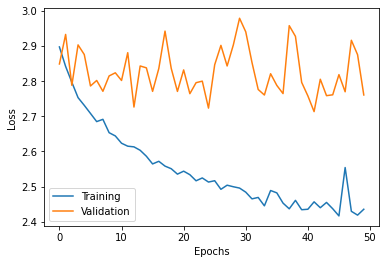

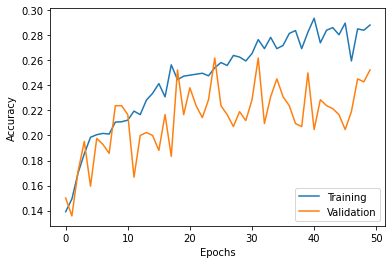

In [ ]:
# plotting the model performance
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_his)